# 9-1Pandas套件：用資料科學的方式分析比特幣的漲跌

現在要到這去下載api: https://www.coingecko.com/en/api/documentation

In [23]:
import requests
data = requests.get("https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=twd&days=90")
data = data.json()["prices"]#requests的json不用.text
data

[[1686315628676, 819381.8250461156],
 [1686319226356, 819125.4376978993],
 [1686322829346, 816017.5790539074],
 [1686326453151, 814095.4356530313],
 [1686330021032, 813321.2268582141],
 [1686333648500, 813856.1337308192],
 [1686337235697, 812410.1341494934],
 [1686340836686, 811980.1308327301],
 [1686344435847, 812212.4207671905],
 [1686348074358, 812510.8812781037],
 [1686351688380, 812773.3283219456],
 [1686355236911, 812245.5570858563],
 [1686358831139, 811826.1042505134],
 [1686362436878, 811461.6862298406],
 [1686366017066, 809513.7121024474],
 [1686369643188, 808002.8520279574],
 [1686373217283, 793581.7549930871],
 [1686376813745, 786105.6145705354],
 [1686380427279, 784853.1589043183],
 [1686384025324, 788714.9464306328],
 [1686387673174, 788345.7765037193],
 [1686391237244, 787242.8341191458],
 [1686394816404, 788845.8795009961],
 [1686398422330, 789211.8497134205],
 [1686402039108, 787525.4897766196],
 [1686405630914, 786885.2395959541],
 [1686409220019, 787584.879496441],
 [

In [25]:
import json
json.loads(data.text)#json才要.text

{'prices': [[1686225636947, 812994.7073673606],
  [1686229244419, 815869.2265802773],
  [1686232818312, 811391.0466195713],
  [1686236440354, 818538.4731153329],
  [1686240032194, 821505.3359253921],
  [1686243680329, 815069.8122445128],
  [1686247200440, 813535.4236061508],
  [1686250824583, 814763.0173972329],
  [1686254441394, 814655.145902953],
  [1686258022964, 817839.8054528749],
  [1686261637634, 814554.9478865506],
  [1686265228405, 815058.5466366863],
  [1686268835558, 812949.9086639702],
  [1686272433759, 812985.7280261156],
  [1686276004817, 815436.0039551647],
  [1686279603949, 811743.8494268246],
  [1686283232359, 815198.4684253621],
  [1686286822509, 814480.4354282209],
  [1686290437762, 814321.2588225807],
  [1686294005207, 814151.1695110218],
  [1686297642558, 813152.0863332578],
  [1686301228573, 818632.8386931665],
  [1686304876855, 819242.9415514792],
  [1686308445892, 819185.7029521574],
  [1686312056150, 818607.9957119016],
  [1686315628676, 819381.8250461156],
  [

In [26]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["datetime", "twd"]
df["datetime"] = pd.to_datetime(df["datetime"], unit = "ms")
df

,datetime,twd
0,2023-06-09 13:00:28.676,819381.825046
1,2023-06-09 14:00:26.356,819125.437698
2,2023-06-09 15:00:29.346,816017.579054
3,2023-06-09 16:00:53.151,814095.435653
4,2023-06-09 17:00:21.032,813321.226858
...,...,...
2157,2023-09-07 09:01:28.878,824195.580752
2158,2023-09-07 10:00:21.617,825128.890960
2159,2023-09-07 11:00:04.682,824639.364662
2160,2023-09-07 12:00:57.834,824161.235266


<AxesSubplot:xlabel='datetime'>

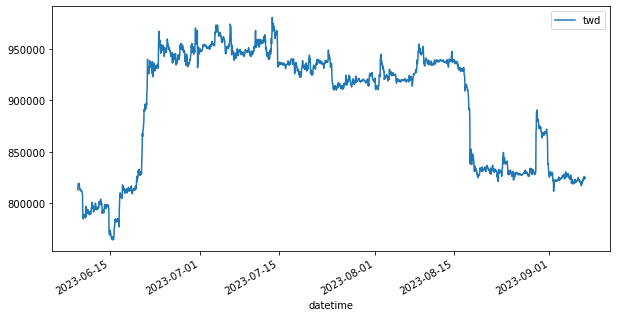

In [4]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["datetime", "twd"]
df["datetime"] = pd.to_datetime(df["datetime"], unit = "ms")
df = df.set_index("datetime")
df["twd"].plot(kind = "line", figsize = (10 ,5), legend = True)

In [31]:
import pandas as pd

s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
r = s.rolling(window = 3)
s = r.mean()
s

a    NaN
b    NaN
c    2.0
d    3.0
e    4.0
dtype: float64

<AxesSubplot:xlabel='datetime'>

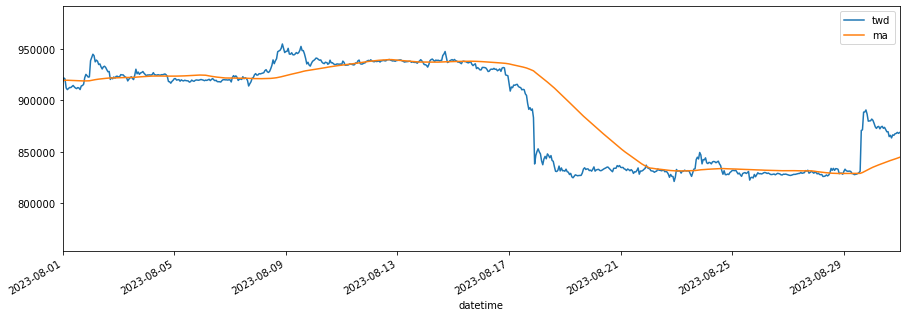

In [43]:
import requests
import pandas as pd

def get_price(url):
    res = requests.get(url)
    data_prices = res.json()["prices"]
    
    df = pd.DataFrame(data_prices)
    df.columns = ["datetime", "twd"]
    df["datetime"] = pd.to_datetime(df["datetime"], unit = "ms")
    
    df.index = df["datetime"]
    return df
    

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=twd&days=90"
bitcoin = get_price(url)

bitcoin["ma"] = bitcoin["twd"].rolling(window = 100).mean()
bitcoin[["twd", "ma"]].plot(kind = "line", figsize = (15, 5), xlim = ("2023-08-01", "2023-08-31"))#xlim沒打就是全部

# 9-2Fintech：量化交易與歷史回測

In [9]:
import pandas as pd
df = pd.DataFrame()
df["1"] = [1, 2, 3, 4, 5]
# df["1"].rolling(window = 3).mean()
df[2:]

,1
2,3
3,4
4,5


In [3]:
import bitcoin_module as m

def strategy(df, total, ma_num, stop_earn):
    df["ma"] = df["twd"].rolling(window = ma_num).mean()
#     print(df)
    df = df[ma_num - 1:]#用:代表篩選列
#     print(df)
    entry_price = 0
    max_price = 0
    min_price = 0
    state = "wait_long"
    for i in range(len(df)):
        if state == "wait_long":
            if df["twd"][i] > df["ma"][i]:
                max_price = df["twd"][i]
                entry_price = df["twd"][i]
                state = "entry_long"
        elif state == "wait_short":
            if df["twd"][i] < df["ma"][i]:
                min_price = df["twd"][i]
                entry_price = df["twd"][i]
                state = "entry_short"
        elif state == "entry_long":
            if df["twd"][i] > max_price:
                max_price = df["twd"][i]
            if df["twd"][i] < max_price:
                total += df["twd"][i] - entry_price
                state = "wait_short"
            elif df["twd"][i] - entry_price > stop_earn and stop_earn != 0:
                total += df["twd"][i] - entry_price
                state = "wait_short"
        elif state == "entry_short":
            if df["twd"][i] < min_price:
                min_price = df["twd"][i]
            if df["twd"][i] > min_price:
                total += entry_price - df["twd"][i]
                state = "wait_long"
            elif entry_price - df["twd"][i] > stop_earn and stop_earn != 0:
                total += entry_price - df["twd"][i]
                state = "wait_long"
    return total

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=twd&days=90"
bitcoin = m.get_price(url)
total = strategy(bitcoin, 1000000, 200, 1000)
print(total)

1040375.8035096829


# 9-3實戰：找出比特幣最佳買賣點

In [13]:
a, b, c = 2, 3, 4
if a < b:
    print("1")
if a > b:
    print("2")
if b > a:
    print("3")
elif a < c:
    print("4")
#結論：如果都是if，那就都有可能執行，但加elif的話，與上面最先遇到的if之間，只會有一個被執行

1
3


total= 1140683.207683608  Best MA= 80  Best stop earn 1600


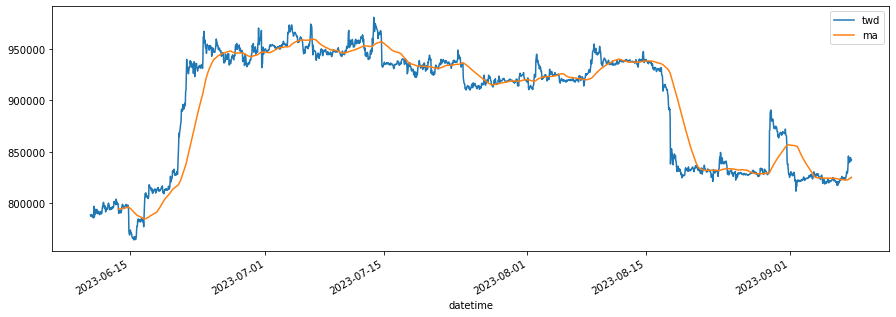

In [1]:
import bitcoin_module as m
import matplotlib.pyplot as plt

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=twd&days=90"
bitcoin = m.get_price(url)

total = 0
for i in range(100, 2000, 100):
    for j in range(100, 2000, 100):
        tmp_total = m.strategy(bitcoin, 1000000, i, j)
        if tmp_total > total:
            total = tmp_total
            best_ma = i
            best_stop_earn = j
            
for i in range(best_ma - 100, best_ma + 100, 10):
    for j in range(best_stop_earn - 100, best_stop_earn + 100, 10):
        tmp_total = m.strategy(bitcoin, 1000000, i, j)
        if tmp_total > total:
            total = tmp_total
            best_ma = i
            best_stop_earn = j
            
print("total=", total, " Best MA=", best_ma, " Best stop earn", best_stop_earn)
bitcoin["ma"] = bitcoin["twd"].rolling(window = best_ma).mean()
bitcoin[["twd", "ma"]].plot(kind = "line", figsize = (15, 5))
plt.show()